In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import requests
import time
import json
import string
from datetime import date 
from scipy.stats import linregress

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Notes: https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7



In [8]:
#Import the API Key
#from api_key import api_key
#Don't need API Key

#import data
#url = "https://data.cdc.gov/resource/hn4x-zwk7.json"
data_df = pd.read_csv(r"Resources\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20231101.csv")

#response = requests.get(url)
#data = response.json()

#data_df.info()
data_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2020,2020,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Race/Ethnicity,Hispanic,RACE,RACEHIS
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88624,2021,2021,ND,North Dakota,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,NaN,Value,...,"(47.47531977900047, -100.11842104899966)",FV,FV1,Q019,VALUE,38,Gender,Male,GEN,MALE
88625,2021,2021,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Income,"$35,000 - $49,999",INC,INC3550
88626,2021,2021,WI,Wisconsin,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(44.39319117400049, -89.81637074199966)",PA,PA1,Q047,VALUE,55,Income,"$75,000 or greater",INC,INC75PLUS
88627,2021,2021,UT,Utah,Behavioral Risk Factor Surveillance System,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,NaN,Value,...,"(39.360700171000474, -111.58713063499971)",FV,FV1,Q018,VALUE,49,Income,"$50,000 - $74,999",INC,INC5075


In [7]:

list_of_categories = data_df['StratificationCategory1'].unique()
list_of_categories


NameError: name 'data_df' is not defined

In [6]:
ethnicity_df = [data_df['StratificationCategory1'] == 'Race/Ethnicity']
ethnicity_df

NameError: name 'data_df' is not defined

In [6]:
education_df = data_df[data_df['StratificationCategory1'] == 'Education']
education_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1,2014,2014,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
7,2012,2012,DC,District of Columbia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q036,VALUE,11,Education,Less than high school,EDU,EDUHS
10,2015,2015,GU,Guam,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(13.444304, 144.793731)",PA,PA1,Q047,VALUE,66,Education,High school graduate,EDU,EDUHSGRAD
21,2012,2012,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Education,Some college or technical school,EDU,EDUCOTEC
43,2016,2016,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,VALUE,44,Education,College graduate,EDU,EDUCOGRAD


In [7]:
income_df = data_df[data_df['StratificationCategory1'] == 'Income']
income_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
2,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"$50,000 - $74,999",INC,INC5075
3,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q037,VALUE,59,Income,Data not reported,INC,INCNR
4,2015,2015,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 300 min...,NaN,Value,...,NaN,PA,PA1,Q045,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
8,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Income,"$25,000 - $34,999",INC,INC2535
13,2012,2012,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(43.235541343, -108.109830353)",PA,PA1,Q047,VALUE,56,Income,"Less than $15,000",INC,INCLESS15


In [8]:
age_df = data_df[data_df['StratificationCategory1'] == 'Age (years)']
age_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
9,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
17,2015,2015,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Age (years),55 - 64,AGEYR,AGEYR5564
24,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",OWS,OWS1,Q037,VALUE,72,Age (years),55 - 64,AGEYR,AGEYR5564
25,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
29,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Age (years),45 - 54,AGEYR,AGEYR4554


In [9]:
gender_df = data_df[data_df['StratificationCategory1'] == 'Gender']
gender_df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
23,2013,2013,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Gender,Female,GEN,FEMALE
32,2020,2020,ME,Maine,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(45.254228894000505, -68.98503133599962)",PA,PA1,Q047,VALUE,23,Gender,Male,GEN,MALE
36,2016,2016,WY,Wyoming,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.235541343, -108.109830353)",OWS,OWS1,Q037,VALUE,56,Gender,Female,GEN,FEMALE
41,2016,2016,NY,New York,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(42.827001032, -75.543970427)",OWS,OWS1,Q036,VALUE,36,Gender,Male,GEN,MALE
49,2016,2016,AR,Arkansas,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(34.748650124, -92.274490743)",OWS,OWS1,Q037,VALUE,5,Gender,Male,GEN,MALE


In [10]:
totals_df = data_df[data_df['StratificationCategory1'] == 'Total']
totals_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
31,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",OWS,OWS1,Q036,VALUE,72,Total,Total,OVR,OVERALL
53,2016,2016,NM,New Mexico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(34.520880952, -106.240580985)",OWS,OWS1,Q036,VALUE,35,Total,Total,OVR,OVERALL
76,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in muscle-strengt...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q046,VALUE,72,Total,Total,OVR,OVERALL
93,2016,2016,NH,New Hampshire,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(43.655950113, -71.50036092)",OWS,OWS1,Q036,VALUE,33,Total,Total,OVR,OVERALL
110,2016,2016,AZ,Arizona,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(34.86597028, -111.763811277)",PA,PA1,Q047,VALUE,4,Total,Total,OVR,OVERALL


In [11]:
#response.content
age_df = data_df[data_df['StratificationCategory1'] == 'Age (years)']
age_df.head()


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
9,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
17,2015,2015,GU,Guam,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(13.444304, 144.793731)",OWS,OWS1,Q036,VALUE,66,Age (years),55 - 64,AGEYR,AGEYR5564
24,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(18.220833, -66.590149)",OWS,OWS1,Q037,VALUE,72,Age (years),55 - 64,AGEYR,AGEYR5564
25,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,PA,PA1,Q047,VALUE,59,Age (years),18 - 24,AGEYR,AGEYR1824
29,2015,2015,PR,Puerto Rico,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,"(18.220833, -66.590149)",PA,PA1,Q047,VALUE,72,Age (years),45 - 54,AGEYR,AGEYR4554


In [12]:
# Convert data into a Pandas DataFrame
#data_df = pd.DataFrame(data)

#data_df = data_df[['yearend','locationabbr','question','data_value','sample_size','age_years','StratificationCategory1','Stratification1']]
data_df = data_df[['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','Race/Ethnicity','Education','Gender','StratificationCategory1','Stratification1']]
#data_df['data_value'] = data_df.data_value.astype(float)
#data_df['sample_size'] = data_df.sample_size.astype(float)

#data_df = data_df[data_df['sample_size'].notna()]

data_df.info()
# Show Record Count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearEnd                  88629 non-null  int64  
 1   LocationAbbr             88629 non-null  object 
 2   Question                 88629 non-null  object 
 3   Data_Value               79851 non-null  float64
 4   Sample_Size              79851 non-null  float64
 5   Race/Ethnicity           25320 non-null  object 
 6   Education                12660 non-null  object 
 7   Gender                   6330 non-null   object 
 8   StratificationCategory1  88620 non-null  object 
 9   Stratification1          88620 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.8+ MB


In [13]:
#Add calculated number of obese people
data_df['calculated_num_obese'] = round(data_df['Sample_Size'] * data_df['Data_Value'] * .01)
data_df.head()

C:\Users\dwarr\AppData\Local\Temp\ipykernel_9040\2666077773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['calculated_num_obese'] = round(data_df['Sample_Size'] * data_df['Data_Value'] * .01)


,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity,Education,Gender,StratificationCategory1,Stratification1,calculated_num_obese
0,2020,US,Percent of adults who engage in no leisure-tim...,30.6,31255.0,Hispanic,NaN,NaN,Race/Ethnicity,Hispanic,9564.0
1,2014,GU,Percent of adults aged 18 years and older who ...,29.3,842.0,NaN,High school graduate,NaN,Education,High school graduate,247.0
2,2013,US,Percent of adults aged 18 years and older who ...,28.8,62562.0,NaN,NaN,NaN,Income,"$50,000 - $74,999",18018.0
3,2013,US,Percent of adults aged 18 years and older who ...,32.7,60069.0,NaN,NaN,NaN,Income,Data not reported,19643.0
4,2015,US,Percent of adults who achieve at least 300 min...,26.6,30904.0,NaN,NaN,NaN,Income,"Less than $15,000",8220.0


In [14]:
num_of_participants = data_df['Sample_Size'].sum()
num_of_participants

291999859.0

In [15]:
#These are the questions this dataset answers
list_of_questions = data_df['Question'].unique()
print(sorted(list_of_questions))

['Percent of adults aged 18 years and older who have an overweight classification', 'Percent of adults aged 18 years and older who have obesity', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who engage in no leisure-time physical activity', 'Percent of adults who report consuming fru

In [16]:
overweight_df = data_df[data_df['Question'] == 'Percent of adults aged 18 years and older who have an overweight classification']
overweight_df.head()

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity,Education,Gender,StratificationCategory1,Stratification1,calculated_num_obese
3,2013,US,Percent of adults aged 18 years and older who ...,32.7,60069.0,NaN,NaN,NaN,Income,Data not reported,19643.0
6,2012,WY,Percent of adults aged 18 years and older who ...,48.5,69.0,American Indian/Alaska Native,NaN,NaN,Race/Ethnicity,American Indian/Alaska Native,33.0
11,2015,RI,Percent of adults aged 18 years and older who ...,40.2,354.0,Hispanic,NaN,NaN,Race/Ethnicity,Hispanic,142.0
16,2015,GU,Percent of adults aged 18 years and older who ...,NaN,NaN,Other,NaN,NaN,Race/Ethnicity,Other,NaN
21,2012,US,Percent of adults aged 18 years and older who ...,35.1,120032.0,NaN,Some college or technical school,NaN,Education,Some college or technical school,42131.0


In [17]:
obese_df = data_df[data_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']
obese_df.head()

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity,Education,Gender,StratificationCategory1,Stratification1,calculated_num_obese
1,2014,GU,Percent of adults aged 18 years and older who ...,29.3,842.0,NaN,High school graduate,NaN,Education,High school graduate,247.0
2,2013,US,Percent of adults aged 18 years and older who ...,28.8,62562.0,NaN,NaN,NaN,Income,"$50,000 - $74,999",18018.0
7,2012,DC,Percent of adults aged 18 years and older who ...,31.6,243.0,NaN,Less than high school,NaN,Education,Less than high school,77.0
9,2011,AL,Percent of adults aged 18 years and older who ...,35.2,598.0,NaN,NaN,NaN,Age (years),25 - 34,210.0
12,2011,US,Percent of adults aged 18 years and older who ...,35.4,6649.0,American Indian/Alaska Native,NaN,NaN,Race/Ethnicity,American Indian/Alaska Native,2354.0


In [19]:
no_leisure_df = data_df[data_df['Question'] == 'Percent of adults who engage in no leisure-time physical activity']
no_leisure_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16549 entries, 0 to 88628
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearEnd                  16549 non-null  int64  
 1   LocationAbbr             16549 non-null  object 
 2   Question                 16549 non-null  object 
 3   Data_Value               14984 non-null  float64
 4   Sample_Size              14984 non-null  float64
 5   Race/Ethnicity           4728 non-null   object 
 6   Education                2364 non-null   object 
 7   Gender                   1182 non-null   object 
 8   StratificationCategory1  16548 non-null  object 
 9   Stratification1          16548 non-null  object 
 10  calculated_num_obese     14984 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.5+ MB


In [20]:
no_fruit_df = data_df[data_df['Question'] == 'Percent of adults who report consuming fruit less than one time daily']
no_fruit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4565 entries, 22 to 88627
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearEnd                  4565 non-null   int64  
 1   LocationAbbr             4565 non-null   object 
 2   Question                 4565 non-null   object 
 3   Data_Value               4080 non-null   float64
 4   Sample_Size              4080 non-null   float64
 5   Race/Ethnicity           1304 non-null   object 
 6   Education                652 non-null    object 
 7   Gender                   326 non-null    object 
 8   StratificationCategory1  4564 non-null   object 
 9   Stratification1          4564 non-null   object 
 10  calculated_num_obese     4080 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 428.0+ KB


In [21]:
no_vegetables_df = data_df[data_df['Question'] == 'Percent of adults who report consuming vegetables less than one time daily']
no_vegetables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4565 entries, 75 to 88624
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearEnd                  4565 non-null   int64  
 1   LocationAbbr             4565 non-null   object 
 2   Question                 4565 non-null   object 
 3   Data_Value               4075 non-null   float64
 4   Sample_Size              4075 non-null   float64
 5   Race/Ethnicity           1304 non-null   object 
 6   Education                652 non-null    object 
 7   Gender                   326 non-null    object 
 8   StratificationCategory1  4564 non-null   object 
 9   Stratification1          4564 non-null   object 
 10  calculated_num_obese     4075 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 428.0+ KB


In [22]:
alabama_df = data_df[data_df['LocationAbbr'] == 'AL']
alabama_df.head()

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,Race/Ethnicity,Education,Gender,StratificationCategory1,Stratification1,calculated_num_obese
9,2011,AL,Percent of adults aged 18 years and older who ...,35.2,598.0,NaN,NaN,NaN,Age (years),25 - 34,210.0
48,2016,AL,Percent of adults aged 18 years and older who ...,35.3,1402.0,NaN,NaN,NaN,Age (years),55 - 64,495.0
119,2018,AL,Percent of adults aged 18 years and older who ...,31.9,719.0,NaN,NaN,NaN,Age (years),35 - 44,229.0
236,2020,AL,Percent of adults aged 18 years and older who ...,37.7,2089.0,NaN,NaN,Male,Gender,Male,788.0
305,2016,AL,Percent of adults aged 18 years and older who ...,NaN,NaN,Hawaiian/Pacific Islander,NaN,NaN,Race/Ethnicity,Hawaiian/Pacific Islander,NaN


In [40]:
gender_data_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

gender_data_df = gender_data_df[gender_data_df['YearEnd']==2021]
gender_data_df = gender_data_df[gender_data_df['LocationAbbr']=='US']
#gender_data_df = gender_data_df[gender_data_df['StratificationCategory1']=='Gender']
gender_data_df = gender_data_df[gender_data_df['StratificationCategory1']=='Age (years)']
gender_data_df = gender_data_df[gender_data_df['Question']=='Percent of adults aged 18 years and older who have obesity']

gender_data_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
81888,2021,US,Percent of adults aged 18 years and older who ...,36.8,51179.0,Age (years),35 - 44
83687,2021,US,Percent of adults aged 18 years and older who ...,20.7,22944.0,Age (years),18 - 24
83935,2021,US,Percent of adults aged 18 years and older who ...,32.0,40994.0,Age (years),25 - 34
86562,2021,US,Percent of adults aged 18 years and older who ...,29.5,139052.0,Age (years),65 or older
86979,2021,US,Percent of adults aged 18 years and older who ...,38.1,73358.0,Age (years),55 - 64
88500,2021,US,Percent of adults aged 18 years and older who ...,39.3,57677.0,Age (years),45 - 54


In [38]:
list_of_locations = gender_data_df['LocationAbbr'].unique()
list_of_locations

array(['NH', 'NM', 'LA', 'VI', 'WV', 'NE', 'HI', 'WY', 'RI', 'AZ', 'TN',
       'FL', 'MD', 'MA', 'VA', 'PA', 'VT', 'GA', 'IA', 'SD', 'IN', 'MI',
       'CO', 'NJ', 'GU', 'ND', 'WI', 'KY', 'MT', 'IL', 'US', 'TX', 'MO',
       'AK', 'PR', 'NY', 'NV', 'WA', 'CT', 'NC', 'KS', 'SC', 'UT', 'OR',
       'CA', 'DE', 'OK', 'DC', 'MN', 'MS', 'ID', 'AR', 'AL', 'OH', 'ME'],
      dtype=object)

Text(0, 0.5, 'Percent of Obese')

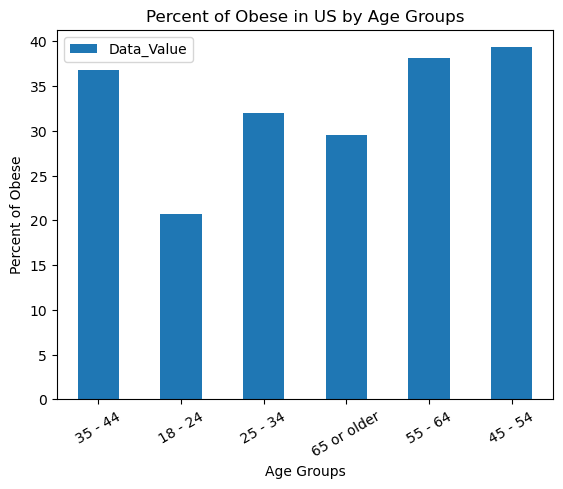

In [44]:
gender_data_df.plot.bar(x='Stratification1', y='Data_Value')

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Percent of Obese in US by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Percent of Obese")


In [24]:
gender_data_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

gender_data_df = gender_data_df[gender_data_df['YearEnd']==2021]
gender_data_df = gender_data_df[gender_data_df['LocationAbbr']=='US']
#gender_data_df = gender_data_df[gender_data_df['StratificationCategory1']=='Gender']
gender_data_df = gender_data_df[gender_data_df['StratificationCategory1']=='Income']
gender_data_df = gender_data_df[gender_data_df['Question']== 'Percent of adults who engage in no leisure-time physical activity']
gender_data_df = gender_data_df.dropna()
gender_data_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
81199,2021,US,Percent of adults who engage in no leisure-tim...,31.7,43004.0,Income,"$25,000 - $34,999"
81986,2021,US,Percent of adults who engage in no leisure-tim...,17.6,47396.0,Income,"$75,000 or greater"
82958,2021,US,Percent of adults who engage in no leisure-tim...,27.0,47501.0,Income,"$35,000 - $49,999"
84046,2021,US,Percent of adults who engage in no leisure-tim...,20.3,58762.0,Income,"$50,000 - $74,999"
85199,2021,US,Percent of adults who engage in no leisure-tim...,39.9,21003.0,Income,"Less than $15,000"
87551,2021,US,Percent of adults who engage in no leisure-tim...,36.2,34769.0,Income,"$15,000 - $24,999"
88628,2021,US,Percent of adults who engage in no leisure-tim...,19.0,178279.0,Income,Data not reported


Text(0, 0.5, 'Percent of Obese')

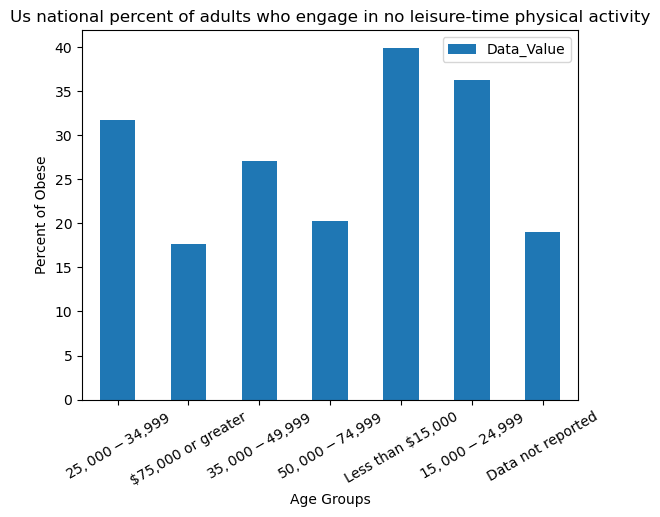

In [25]:
gender_data_df.plot.bar(x='Stratification1', y='Data_Value')

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Us national percent of adults who engage in no leisure-time physical activity")
plt.xlabel("Age Groups")
plt.ylabel("Percent of Obese")

In [ ]:
Percent of adults who engage in no leisure-time physical activity